In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [8]:
PATH = '../Logs/'
BMs = ['array', 'list', 'tree', 'graph']
ALGOs = ['Tracing', 'Counting_Instant', 'Counting_Late']
DATA_SIZES = [255, 2_047, 8_191, 16_384, 32_768]
filenames = {(algo, bm, data_size):
    f'{PATH}{bm}_bm/{bm}_bm_{algo}_RDFS_{data_size}'
    for bm in BMs
    for data_size in DATA_SIZES
    for algo in ALGOs
}
times = {key: np.array([pd.read_csv(filename + f'_{i}.csv')['Dt (μs)'].sum() for i in range(1, 10+1)]) for key, filename in filenames.items()}

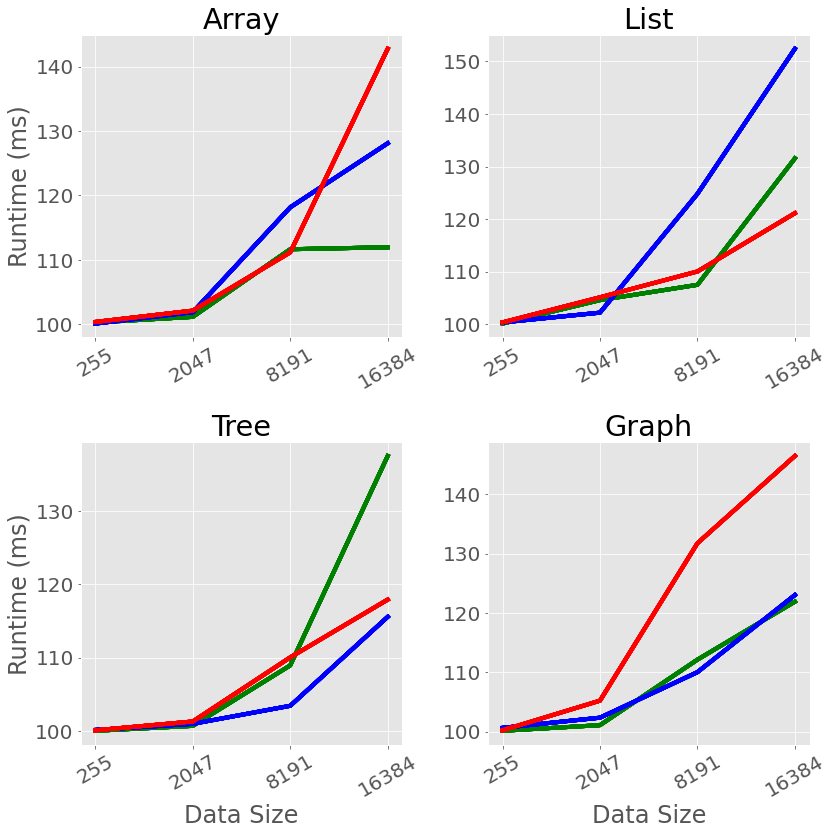

In [13]:
COLORS = ['green', 'blue', 'red']
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(12, 12), facecolor='white')
gs = fig.add_gridspec(2,2)
for i, bm in enumerate(BMs):
    ax = fig.add_subplot(gs[i//2, i%2])
    for algo_no, algo in enumerate(ALGOs):
        y = [np.mean(times[(algo, bm, data_size)] / 1_000) for data_size in DATA_SIZES]
        plt.plot(y, label=algo.replace("_", " "), linewidth=4, color=COLORS[algo_no])
        error = np.std(y)
        plt.fill_between(np.arange(len(DATA_SIZES)), y-error, y+error)
    ax.set_title(bm.title())
    ax.set_xticks(np.arange(len(DATA_SIZES)), DATA_SIZES, rotation=30)
fig.get_axes()[0].legend(loc='upper left', frameon=False)
fig.get_axes()[0].set_ylabel('Runtime (ms)')
fig.get_axes()[2].set_ylabel('Runtime (ms)')
fig.get_axes()[2].set_xlabel('Data Size')
fig.get_axes()[3].set_xlabel('Data Size')
plt.tight_layout()
plt.savefig('../Plots/datasize.png')
plt.show()